In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import analysis

In [2]:
result_summary = pd.read_csv("summary.csv")
result_summary

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
0,2025-05-18 21:42,Normal,data/run/test.toml,data/result/2025-05-18 21:42_Normal/loss.dat,data/result/2025-05-18 21:42_Normal/val_loss.dat,5.004520,-2.372256,4.406543,data/result/2025-05-18 21:42_Normal/result.csv,0:21:04.154756,Base test
1,2025-05-19 06:48,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 06:48_Custom Model Chec...,data/result/2025-05-19 06:48_Custom Model Chec...,4.001656,0.430788,3.978401,data/result/2025-05-19 06:48_Custom Model Chec...,0:29:12.068107,Monitor loss
2,2025-05-19 09:09,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 09:09_Custom Model Chec...,data/result/2025-05-19 09:09_Custom Model Chec...,3.650280,1.068165,3.490497,data/result/2025-05-19 09:09_Custom Model Chec...,0:19:37.964186,Monitor val_mae
3,2025-05-19 09:31,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 09:31_Custom Model Chec...,data/result/2025-05-19 09:31_Custom Model Chec...,3.967415,-0.478311,3.938477,data/result/2025-05-19 09:31_Custom Model Chec...,0:19:06.399232,Monitor mae
4,2025-05-19 12:55,Test N=1,data/run/2025-05-19 12:54/config_1.toml,data/result/2025-05-19 12:55_Test N=1/loss.dat,data/result/2025-05-19 12:55_Test N=1/val_loss...,4.874990,1.954241,4.466147,data/result/2025-05-19 12:55_Test N=1/result.csv,0:31:44.701787,1
5,2025-05-19 12:55,Test N=9,data/run/2025-05-19 12:54/config_9.toml,data/result/2025-05-19 12:55_Test N=9/loss.dat,data/result/2025-05-19 12:55_Test N=9/val_loss...,3.419267,-1.240874,3.186160,data/result/2025-05-19 12:55_Test N=9/result.csv,0:31:45.304957,9
6,2025-05-19 12:55,Test N=5,data/run/2025-05-19 12:54/config_5.toml,data/result/2025-05-19 12:55_Test N=5/loss.dat,data/result/2025-05-19 12:55_Test N=5/val_loss...,3.600788,0.277289,3.590095,data/result/2025-05-19 12:55_Test N=5/result.csv,0:31:46.313858,5
7,2025-05-19 12:55,Test N=2,data/run/2025-05-19 12:54/config_2.toml,data/result/2025-05-19 12:55_Test N=2/loss.dat,data/result/2025-05-19 12:55_Test N=2/val_loss...,4.272138,-2.813197,3.215134,data/result/2025-05-19 12:55_Test N=2/result.csv,0:31:46.538811,2
8,2025-05-19 12:55,Test N=10,data/run/2025-05-19 12:54/config_10.toml,data/result/2025-05-19 12:55_Test N=10/loss.dat,data/result/2025-05-19 12:55_Test N=10/val_los...,3.525656,-0.627629,3.469341,data/result/2025-05-19 12:55_Test N=10/result.csv,0:31:46.851799,10
9,2025-05-19 12:55,Test N=7,data/run/2025-05-19 12:54/config_7.toml,data/result/2025-05-19 12:55_Test N=7/loss.dat,data/result/2025-05-19 12:55_Test N=7/val_loss...,2.825034,-0.517837,2.777168,data/result/2025-05-19 12:55_Test N=7/result.csv,0:31:49.854331,7


In [3]:
mass_table = result_summary.loc[16, "output_file"]
df = pd.read_csv(mass_table)
df

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,target,prediction,difference
0,8.0,8.0,1.0,1.0,6.349604,22.223615,0.000000,0.250000,-118.0,-118.0,-2.688779,-2.843925,0.155146
1,9.0,8.0,-1.0,1.0,6.611489,21.779023,0.058824,0.242536,-117.0,-118.0,1.328922,1.466791,-0.137869
2,10.0,8.0,1.0,1.0,6.868285,21.367999,0.222222,0.235702,-116.0,-118.0,0.948460,1.139174,-0.190715
3,11.0,8.0,-1.0,1.0,7.120367,20.986346,0.473684,0.229416,-115.0,-118.0,5.213544,5.132057,0.081487
4,12.0,8.0,1.0,1.0,7.368063,20.630576,0.800000,0.223607,-114.0,-118.0,3.233313,3.565157,-0.331844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,245.0,110.0,-1.0,1.0,50.136295,1693.335703,51.338028,0.053074,119.0,-16.0,522.201200,524.555200,-2.353976
6421,246.0,110.0,1.0,1.0,50.230403,1691.748696,51.955056,0.053000,120.0,-16.0,529.713500,530.734000,-1.020509
6422,247.0,110.0,-1.0,1.0,50.324424,1690.167622,52.574230,0.052926,121.0,-16.0,537.315900,537.723100,-0.407183
6423,248.0,110.0,1.0,1.0,50.418356,1688.592441,53.195531,0.052852,122.0,-16.0,544.664900,544.058530,0.606367


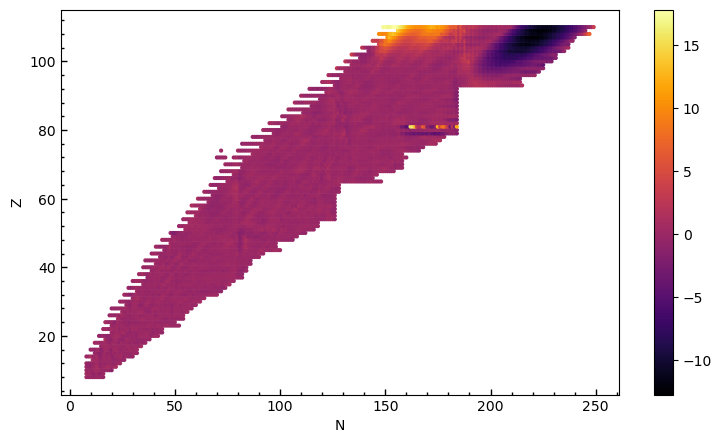

In [ ]:
analysis.plot.nuclear_landscape(df["param_1"], df["param_2"], df["difference"])